Review and Grade:
Project Presentation – In class – counts for 5% in the final grade.
Code Review - TAs will conduct code review with you and grade your code. This part counts
10% in the final grade.
Data Background:
The market for melatonin products is very chaotic, with products of various doses abounding.
The aim of this project is to analyze the distribution and user response of various doses of the
product based on this data.
The datasets are scraped from Amazon and Walmart.
Requirements:
Two main parts: EDA and NLP
Suggested Analysis Content:
EDA and Visualization:
• Different brands
• Different doses: 1mg, 3mg, 5mg, 10mg, 15 mg, 20mg, 25mg etc.
• Different forms: Gummy or tablet
• Different flavors: strawberry, citrus, etc.
• After NLP, different rating, and with different doses
• And so on.
NLP from Review: Analysis of different doses from reviews:
• Different time taking pills, e.g. 10 minutes before go bed or after feel sleepy; I had no
problem falling asleep within an hour of taking these tablets...... .....
DAMG6105 Professor Handan Liu
• How long after taking the pills do you feel sleepy:
• Duration of use: e.g. Tasty and effective; been using for over a year
• Will you recommend it to others?
• And so on
Suggested Steps:
1. Load the dataset.
2. Check shapes.
3. Extract MG details from the product title.
4. Concatenate the data frames.
5. Analyze and Visualize various variables (univariate, bivariate, multivariate if possible)
6. Perform NLP Data cleaning (not only limited to)
a. Stemming
b. Lemmatization
c. Removing Stop words
d. Punctuations
e. Common words like Package etc.
7. Check the Frequency of words like top 10 or something.
8. Form N Grams
9. Form Word Clouds
10. Perform Sentiment Analysis
11. Check Sentiment of each doses.
12. Distribution of the ratings for each dose.
13. Average rating over doses.
14. How users take melatonin: thirty minutes before bed, ten minutes before bed, etc.
15. Users' reactions to taking melatonin: Hot words extraction and analysis, such as 2-gram, or
3-gram etc.
16. The intensity of user emotions: statistics and analytical adjectives
17. Sentiment analysis: positive, neutral, negative analysis, Polarity and Subjectivity, etc.
18. Check the sentiment over the time.
19. Number of reviews trend over time
20. What doses People Prefer?
Refer to Nov 15 th class Notebook and Nov 22 nd class Notebook.
Note: You're encouraged to develop additional questions and visualizations based on your
creativity and the insights you uncover from the dataset.
Attention: Don't copy the solutions from chatGPT or other online resources, otherwise the
submission will be treated as plagiarism.

In [1]:
# Step 1: Load the Dataset and Check Basic Information

import pandas as pd
import requests
from io import BytesIO

# Define the base URL for your GitHub files
base_url = "https://raw.githubusercontent.com/The-sunny/DataScienceProject/c4e02e0c276a8781d818522165cf6e97067ace49/Amazon/"

# List of filenames in the "Amazon" folder
file_names = [
"melatonin-amazon-10mg.xlsx",
"melatonin-amazon-12mg.xlsx",
"melatonin-amazon-1mg.xlsx",
"melatonin-amazon-20mg.xlsx",
"melatonin-amazon-3mg.xlsx",
"melatonin-amazon-5mg.xlsx",
"melatonin-amazon-Natrol-Fast-Dissolve-5mg.xlsx"
]

# Create the full URLs for each file
file_urls = [base_url + file_name for file_name in file_names]

# Load all files into a list of DataFrames
dataframes = []
for url in file_urls:
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP request errors
        excel_data = BytesIO(response.content)
        df = pd.read_excel(excel_data)
        dataframes.append(df)
    except Exception as e:
        print(f"Failed to load {url}: {e}")

# Combine all DataFrames into one (optional, depending on your use case)
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the shape of the combined dataset
print("Combined Dataset Shape:", combined_data.shape)

Combined Dataset Shape: (40315, 14)


In [2]:
combined_data.head()

,ASIN,Brand,HelpfulCounts,Images,PageUrl,ParentId,ProductLink,ProductTitle,ReviewContent,ReviewDate,ReviewScore,ReviewTitle,Reviewer,Verified
0,B01E14X7SM,Natrol,3,NaN,https://www.amazon.com/product-reviews/B01E14X...,R3FO147NRH6ZT8,https://www.amazon.com/dp/B01E14X7SM,"Natrol Fast Dissolve Melatonin 10 mg, Melatoni...",I like how they are chewable and almost start ...,"November 4, 2024",5.0,Good sleep aid,Amber Phillips,True
1,B01E14X7SM,Natrol,37,NaN,https://www.amazon.com/product-reviews/B01E14X...,R1H89YQL3760M3,https://www.amazon.com/dp/B01E14X7SM,"Natrol Fast Dissolve Melatonin 10 mg, Melatoni...",The Natrol Melatonin 10mg Strawberry-Flavored ...,"October 31, 2023",5.0,Natrol Melatonin 10mg - My Gateway to Restful ...,Alex,True
2,B01E14X7SM,Natrol,6,NaN,https://www.amazon.com/product-reviews/B01E14X...,R9W5OT5FXDHAV,https://www.amazon.com/dp/B01E14X7SM,"Natrol Fast Dissolve Melatonin 10 mg, Melatoni...",These melatonin tablets are great for my sleep...,"August 12, 2024",5.0,My New Sleep Remedy,Kimmie_12,True
3,B01E14X7SM,Natrol,1,NaN,https://www.amazon.com/product-reviews/B01E14X...,R1ZDUMSIMVVGHM,https://www.amazon.com/dp/B01E14X7SM,"Natrol Fast Dissolve Melatonin 10 mg, Melatoni...",Yes it helps sleep so is effective no side eff...,"October 11, 2024",5.0,Frequent buyer,The pattern and material is ok but the sizing ...,True
4,B01E14X7SM,Natrol,4,NaN,https://www.amazon.com/product-reviews/B01E14X...,R2VGDUJE4231ZS,https://www.amazon.com/dp/B01E14X7SM,"Natrol Fast Dissolve Melatonin 10 mg, Melatoni...",Flavor was not as good as others by this compa...,"September 9, 2024",4.0,Work great but…,Emily Reid,True


In [3]:
combined_data.isna().sum()

,0
ASIN,0
Brand,0
HelpfulCounts,0
Images,32120
PageUrl,0
ParentId,0
ProductLink,0
ProductTitle,0
ReviewContent,393
ReviewDate,0


In [4]:
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40315 entries, 0 to 40314
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           40315 non-null  object 
 1   Brand          40315 non-null  object 
 2   HelpfulCounts  40315 non-null  object 
 3   Images         8195 non-null   object 
 4   PageUrl        40315 non-null  object 
 5   ParentId       40315 non-null  object 
 6   ProductLink    40315 non-null  object 
 7   ProductTitle   40315 non-null  object 
 8   ReviewContent  39922 non-null  object 
 9   ReviewDate     40315 non-null  object 
 10  ReviewScore    40315 non-null  float64
 11  ReviewTitle    40244 non-null  object 
 12  Reviewer       40311 non-null  object 
 13  Verified       40315 non-null  bool   
dtypes: bool(1), float64(1), object(12)
memory usage: 4.0+ MB


In [5]:
#Step 2: Extract Dose Information from ProductTitle

# Extract dose (mg) information using regex
import re

# Function to extract doses from the ProductTitle
def extract_dose(title):
    match = re.search(r'\b(\d+\.?\d*)\s?mg\b', str(title), re.IGNORECASE)
    return float(match.group(1)) if match else None

# Apply the function to extract doses
combined_data['Dose_mg'] = combined_data['ProductTitle'].apply(extract_dose)

# Check unique doses extracted
print("Unique Doses Extracted:")
print(combined_data['Dose_mg'].unique())

Unique Doses Extracted:
[10. 12.  1. 20.  3.  5.]



Brand Distribution:
Brand
Natrol                    19640
Carlyle                    9554
OLLY                       5785
Nature's Perfect Night     5336
Name: count, dtype: int64


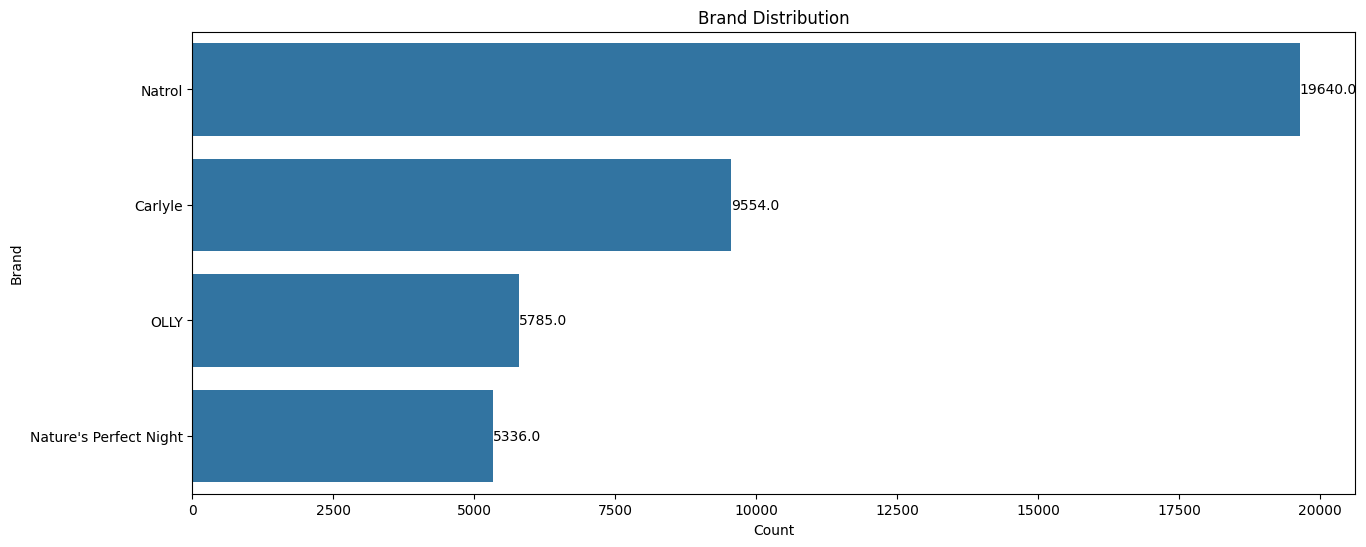

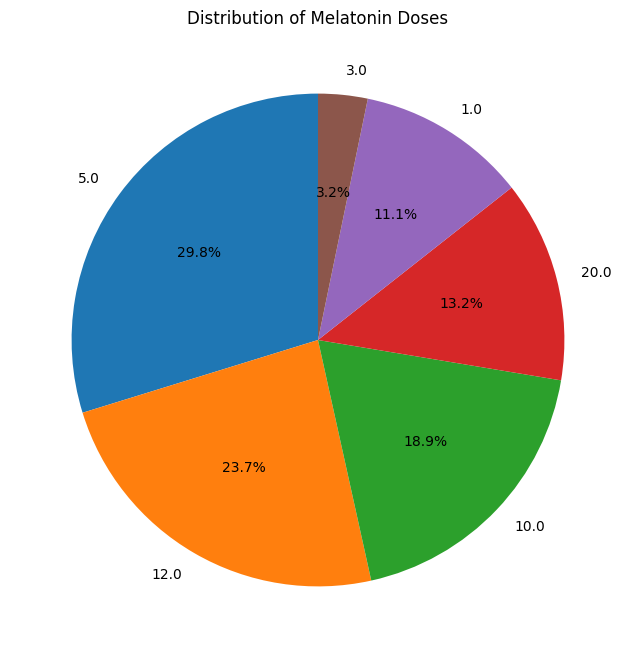

In [6]:
#Step 3: Basic EDA (Brand Distribution, Dose Counts, etc.)

import matplotlib.pyplot as plt
import seaborn as sns

# Brand distribution
print("\nBrand Distribution:")
print(combined_data['Brand'].value_counts())

# Plot Brand distribution
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=combined_data, y='Brand', order=combined_data['Brand'].value_counts().index)
plt.title("Brand Distribution")
plt.xlabel("Count")
plt.ylabel("Brand")
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
                ha='left', va='center')
plt.show()

dose_counts = combined_data['Dose_mg'].value_counts()

# Pie chart for distribution
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(dose_counts, labels=dose_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Melatonin Doses')
plt.show()

In [7]:
# Step 4: Extract Other Details from ProductTitle (Form and Flavor)
# Extract form (e.g: Gummy and Tablet) and flavor from ProductTitle

def extract_form(title):
    title = str(title).lower()
    if 'gummy' in title or 'gummies' in title:
        return 'Gummy'
    elif 'tablet' in title:
        return 'Tablet'
    else:
        return 'Other'

def extract_flavor(title):
    flavors = ['strawberry', 'mixed berry', 'natural berry', 'blackberry', 'cherry']
    for flavor in flavors:
        if flavor in str(title).lower():
            return flavor
    return 'unknown'


combined_data['Form'] = combined_data['ProductTitle'].apply(extract_form)
combined_data['Flavor'] = combined_data['ProductTitle'].apply(extract_flavor)

<ipython-input-8-233c9f19f68b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flavor_counts.index, y=flavor_counts.values, palette="viridis")


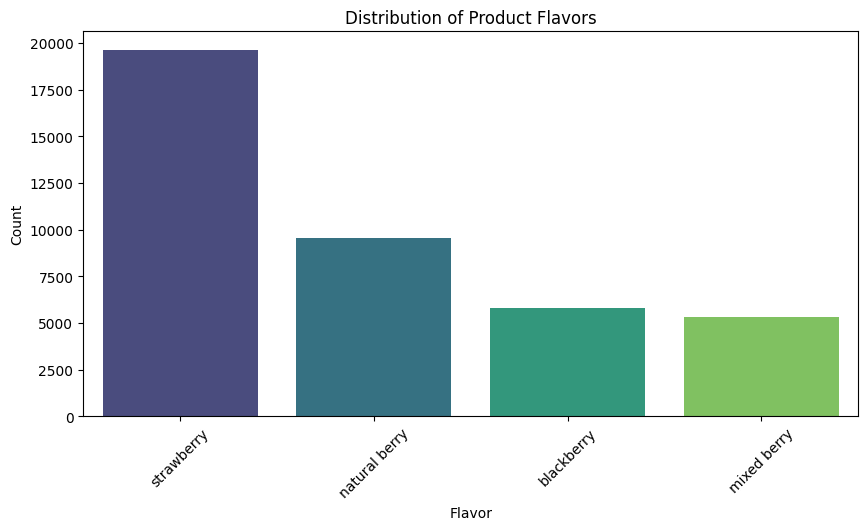

In [8]:
# # Count the occurrences of each flavor
flavor_counts = combined_data['Flavor'].value_counts()

# Plot the distribution of different flavors and their counts
plt.figure(figsize=(10, 5))
sns.barplot(x=flavor_counts.index, y=flavor_counts.values, palette="viridis")
plt.title('Distribution of Product Flavors')
plt.xlabel('Flavor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

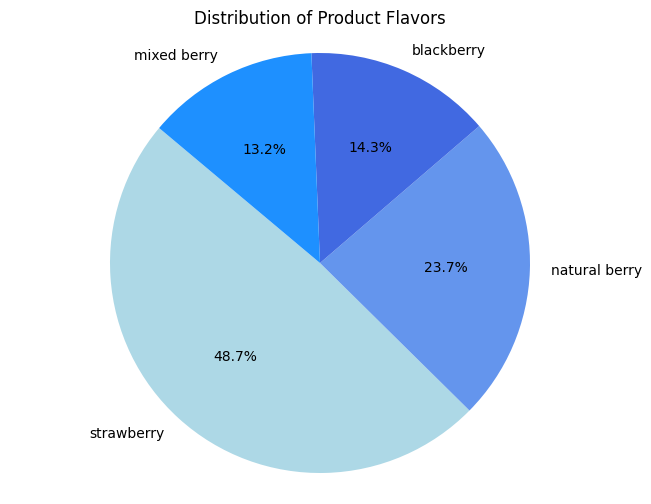

In [9]:
# Plot the distribution of different flavors as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(flavor_counts, labels=flavor_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ADD8E6', '#6495ED', '#4169E1', '#1E90FF', '#00BFFF', '#5DAFFF'])
plt.title('Distribution of Product Flavors')
plt.axis('equal')
plt.show()

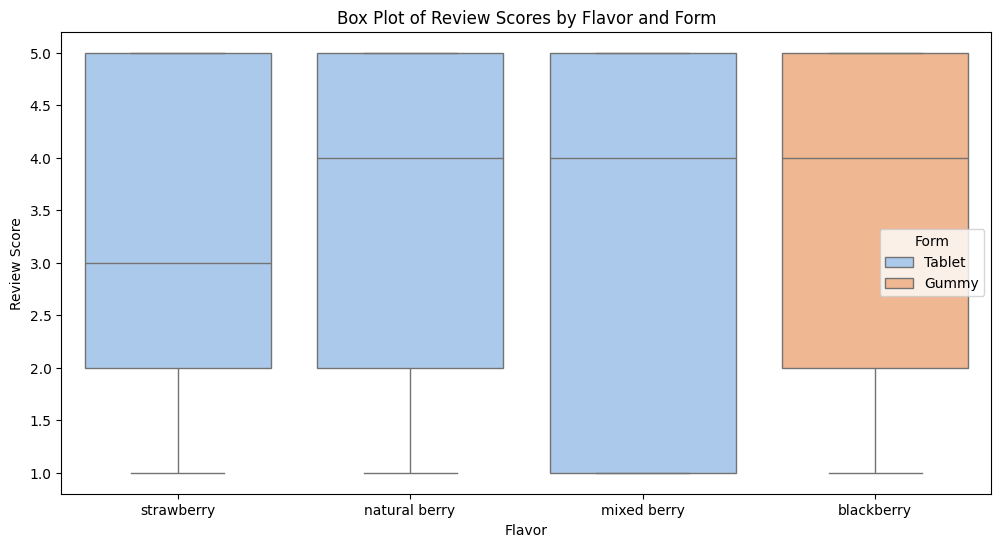

In [10]:
# Multivariate Analysis: Review, Form, and Flavor

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Flavor', y='ReviewScore', hue='Form', data=combined_data, palette='pastel')
plt.title('Box Plot of Review Scores by Flavor and Form')
plt.xlabel('Flavor')
plt.ylabel('Review Score')
plt.legend(title='Form')
plt.show()

<ipython-input-11-d5555f35b2bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Brand', y='ReviewScore', data=combined_data, palette='muted')


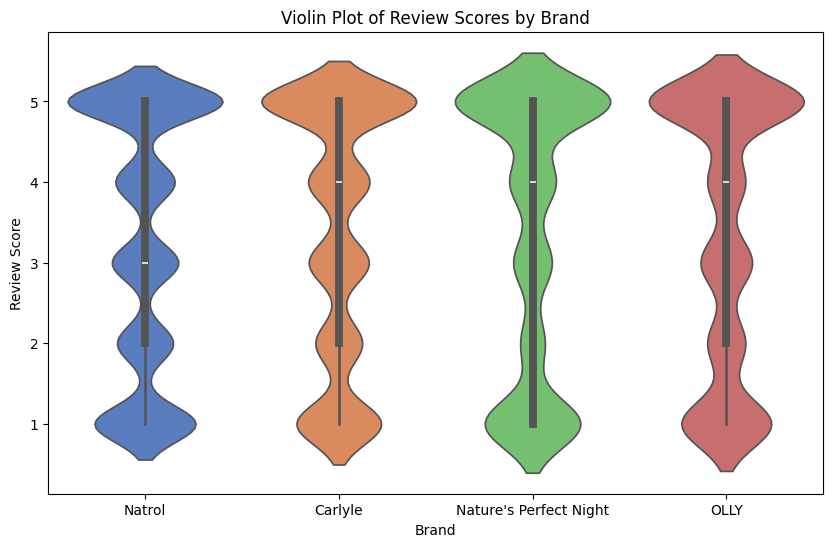

In [11]:
# Bivariate Review Score and Brand

# Violin Plot for Review Score by Brand
plt.figure(figsize=(10, 6))
sns.violinplot(x='Brand', y='ReviewScore', data=combined_data, palette='muted')
plt.title('Violin Plot of Review Scores by Brand')
plt.xlabel('Brand')
plt.ylabel('Review Score')
plt.show()

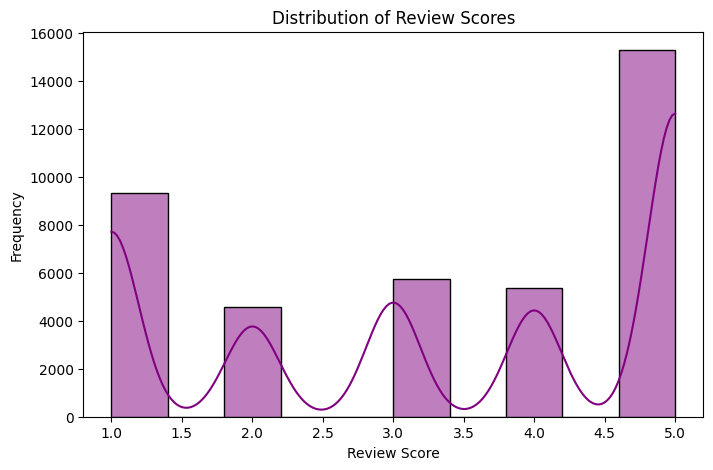

In [12]:
#Univariate Analysis - Review Scores

# Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(combined_data['ReviewScore'], bins=10, kde=True, color='purple')
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()


Form Distribution:
Form
Tablet    34530
Gummy      5785
Name: count, dtype: int64


<ipython-input-13-09f17c1ccca9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_data, x='Form', order=combined_data['Form'].value_counts().index, palette="pastel")


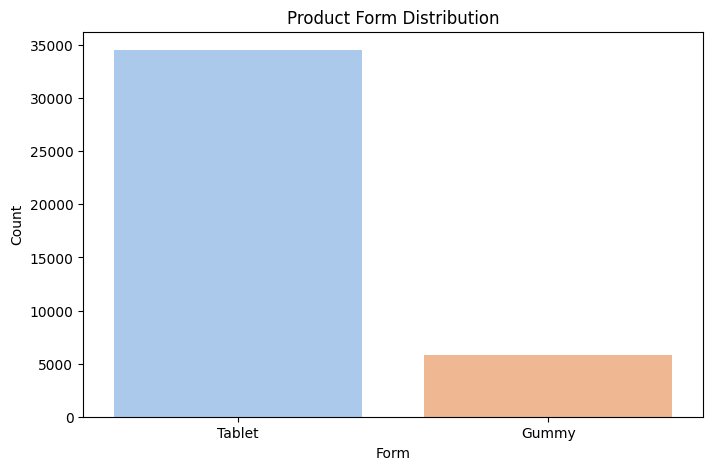

In [13]:
# Form distribution
print("\nForm Distribution:")
print(combined_data['Form'].value_counts())

# Plot Form distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_data, x='Form', order=combined_data['Form'].value_counts().index, palette="pastel")
plt.title("Product Form Distribution")
plt.xlabel("Form")
plt.ylabel("Count")
plt.show()

<ipython-input-14-bf84c4be3291>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dose_mg', y='ReviewScore', palette="coolwarm")


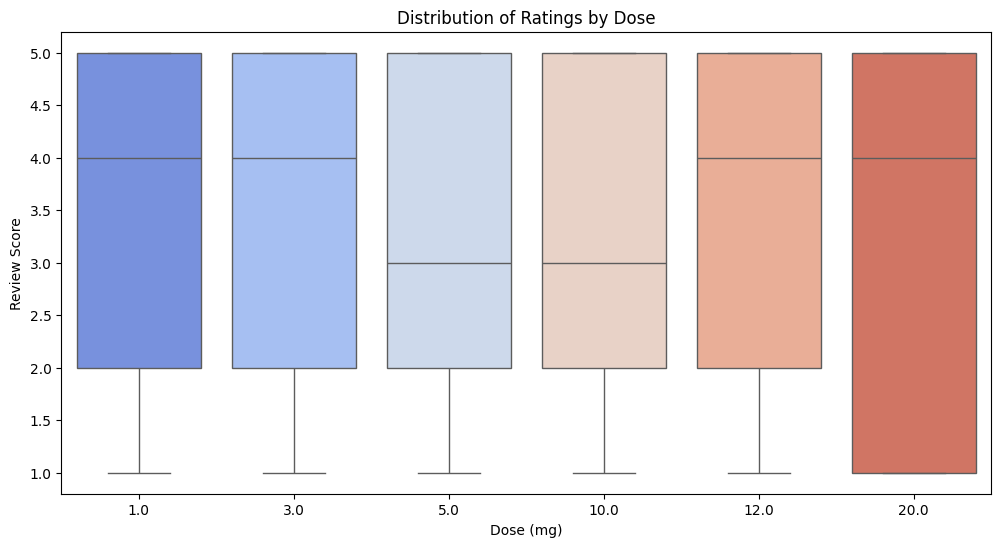

In [14]:
# Boxplot for Ratings by Dose
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Dose_mg', y='ReviewScore', palette="coolwarm")
plt.title("Distribution of Ratings by Dose")
plt.xlabel("Dose (mg)")
plt.ylabel("Review Score")
plt.show()

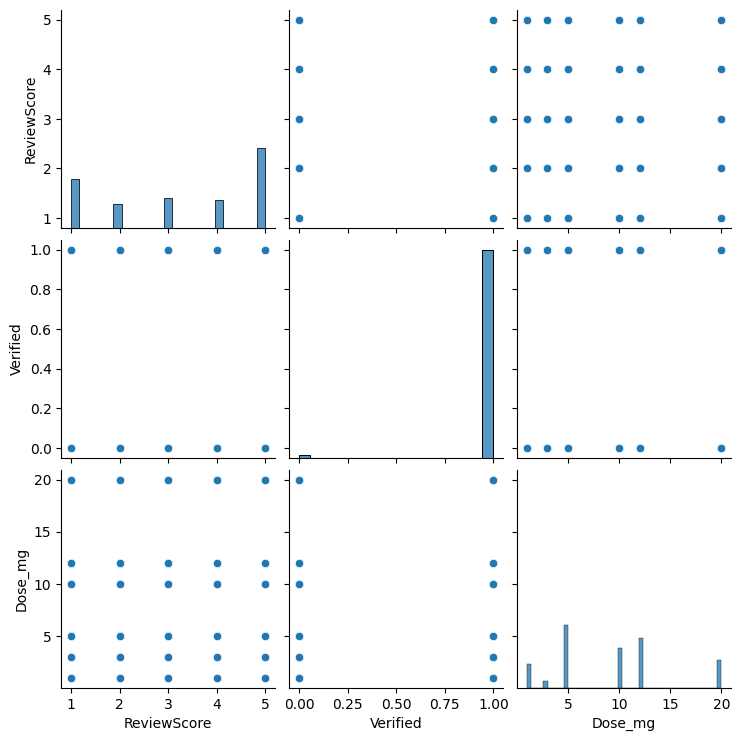

In [15]:
sns.pairplot(combined_data) #Additional multivariate representation

In [16]:
# Reinstall nltk
!pip uninstall nltk -y
!pip install nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.7 MB/s eta 0:00:00


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string

nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define function for cleaning text
def clean_text(text):
    if pd.isna(text):
        return ""
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    words = text.split()
    # Remove stop words and common words
    stop_words = set(stopwords.words('english'))
    common_words = {'package', 'product'}
    words = [word for word in words if word not in stop_words and word not in common_words]
    # Lemmatize and stem the words
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply cleaning function to reviews
combined_data['Cleaned_Review'] = combined_data['ReviewContent'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


<ipython-input-18-b62403cd3270>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(words), palette="viridis")


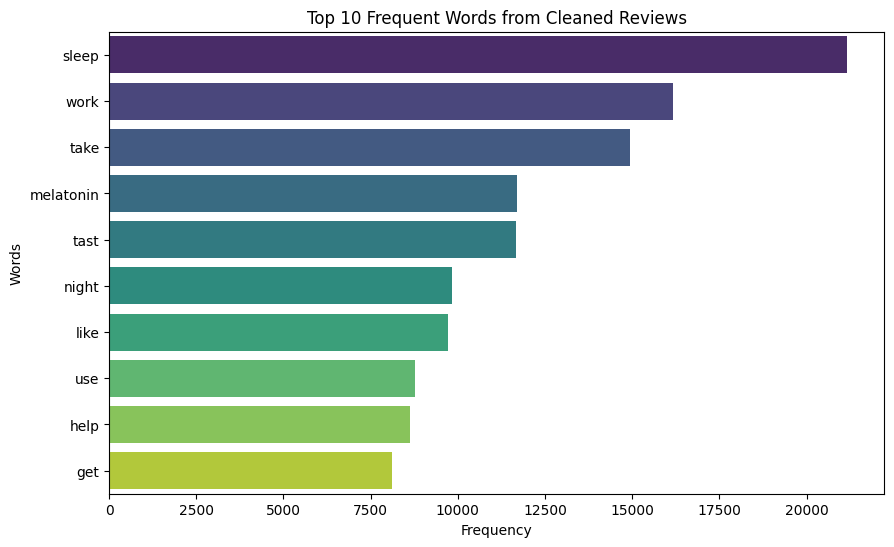

In [18]:
# Step 7: Check the Frequency of words like top 10 or something.

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is available
# Count word frequencies in cleaned reviews
word_counts = Counter(" ".join(combined_data['Cleaned_Review']).split())

# Get top 10 most common words
top_words = word_counts.most_common(10)
words, frequencies = zip(*top_words)

# Plotting the top frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(frequencies), y=list(words), palette="viridis")
plt.title('Top 10 Frequent Words from Cleaned Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()



In [19]:
# Step 8: Form N Grams

from sklearn.feature_extraction.text import CountVectorizer

# Function to generate n-grams
def generate_ngrams(text_series, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_series)
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    return sorted(zip(ngrams, counts), key=lambda x: x[1], reverse=True)

# Generate and print n-grams
def print_top_ngrams(ngrams, top_n=10):
    print(f"Top {top_n} N-Grams:")
    for ngram, count in ngrams[:top_n]:
        print(f"{ngram}: {count}")


# Generate unigrams
print("Unigrams:")
unigrams = generate_ngrams(combined_data['Cleaned_Review'], ngram_range=(1, 1))
print_top_ngrams(unigrams)

# Generate bigrams
print("\nBigrams:")
bigrams = generate_ngrams(combined_data['Cleaned_Review'], ngram_range=(2, 2))
print_top_ngrams(bigrams)

# Generate trigrams
print("\nTrigrams:")
trigrams = generate_ngrams(combined_data['Cleaned_Review'], ngram_range=(3, 3))
print_top_ngrams(trigrams)


Unigrams:
Top 10 N-Grams:
sleep: 21174
work: 16199
take: 14961
melatonin: 11770
tast: 11664
night: 9880
like: 9725
use: 8796
help: 8635
asleep: 8138

Bigrams:
Top 10 N-Grams:
fall asleep: 5133
help sleep: 2328
work well: 2287
help fall: 1813
stay asleep: 1645
sleep aid: 1465
work great: 1414
tast good: 1403
get sleep: 1229
night sleep: 1215

Trigrams:
Top 10 N-Grams:
help fall asleep: 1673
medium could load: 633
good night sleep: 571
fall asleep faster: 444
fall asleep stay: 433
asleep stay asleep: 422
help get sleep: 385
wake middl night: 364
get good night: 323
troubl fall asleep: 309


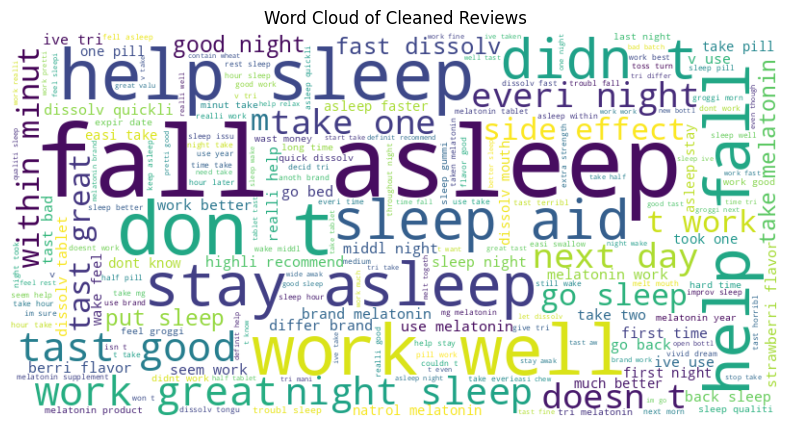

In [20]:
# Step 9: Form Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud from cleaned reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(combined_data['Cleaned_Review']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews')
plt.show()


In [21]:
import pandas as pd
from textblob import TextBlob

# Function to calculate sentiment using TextBlob
def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(text).sentiment.polarity

# Apply the function to the ReviewContent column
combined_data['Sentiment'] = combined_data['ReviewContent'].apply(get_sentiment)

# Calculate average sentiment scores for each dose
average_sentiment = combined_data.groupby('Dose_mg')['Sentiment'].mean().reset_index()

<ipython-input-22-957267ab4c38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_sentiment, x='Dose_mg', y='Sentiment', palette="coolwarm")


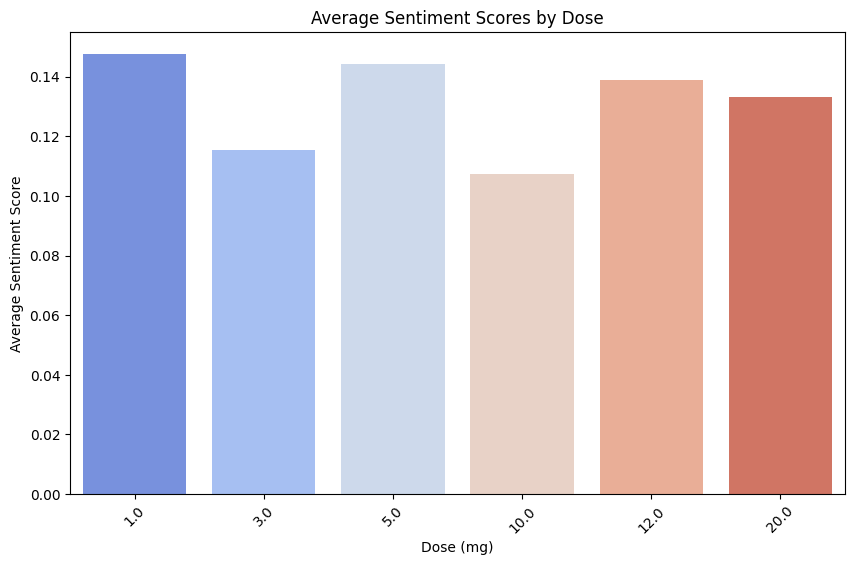

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average sentiment scores by dose
plt.figure(figsize=(10, 6))
sns.barplot(data=average_sentiment, x='Dose_mg', y='Sentiment', palette="coolwarm")
plt.title('Average Sentiment Scores by Dose')
plt.xlabel('Dose (mg)')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Categorize sentiment polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

combined_data['Sentiment_Category'] = combined_data['Sentiment'].apply(categorize_sentiment)


<ipython-input-24-0e7f5ccf462c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dose_mg', y='ReviewScore', palette="coolwarm")


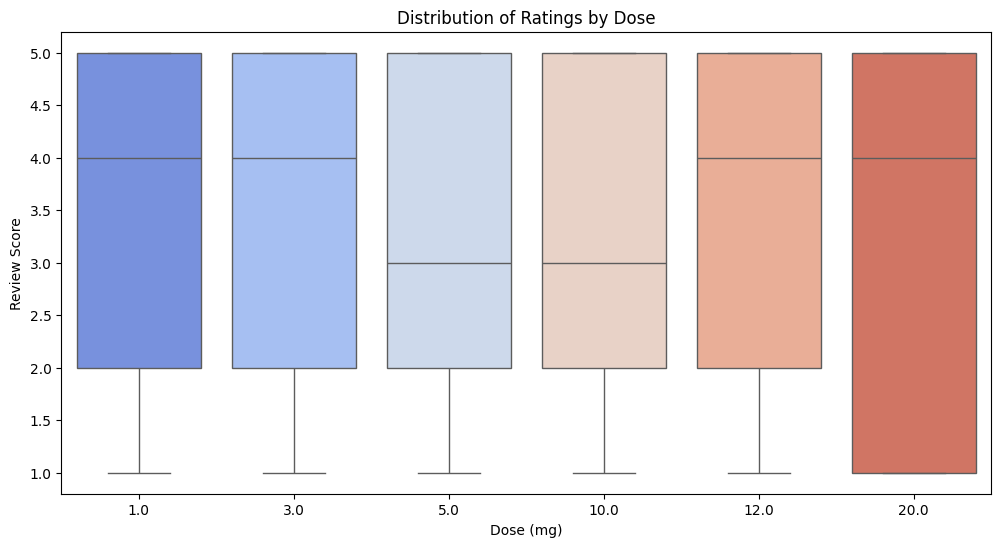

In [24]:
# Boxplot for ratings by dose
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Dose_mg', y='ReviewScore', palette="coolwarm")
plt.title("Distribution of Ratings by Dose")
plt.xlabel("Dose (mg)")
plt.ylabel("Review Score")
plt.show()


<ipython-input-25-5917a28449fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_dose, x='Dose_mg', y='ReviewScore', palette="magma")


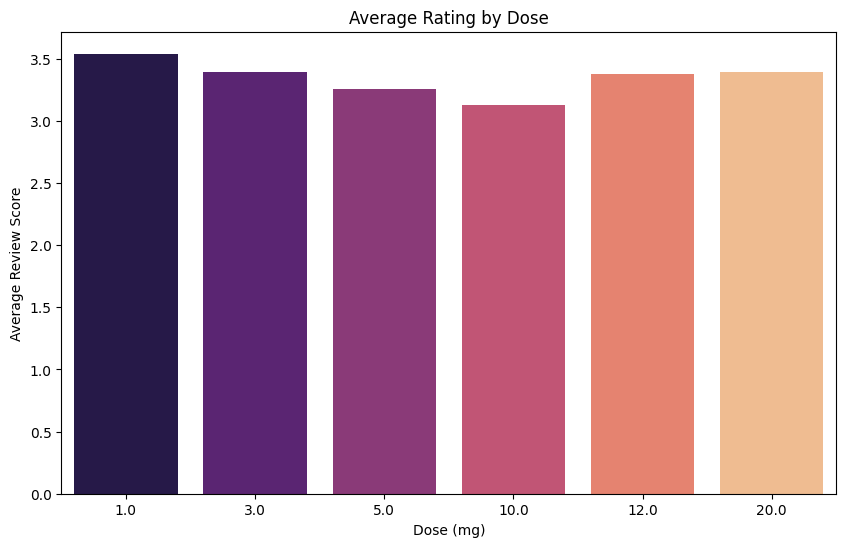

In [25]:
# Calculate average rating for each dose
average_rating_by_dose = combined_data.groupby('Dose_mg')['ReviewScore'].mean().reset_index()

# Plot average rating by dose
plt.figure(figsize=(10, 6))
sns.barplot(data=average_rating_by_dose, x='Dose_mg', y='ReviewScore', palette="magma")
plt.title("Average Rating by Dose")
plt.xlabel("Dose (mg)")
plt.ylabel("Average Review Score")
plt.show()


In [26]:
# 14. How Users Take Melatonin

import re

# Extract usage phrases
def extract_usage_phrases(text):
    if pd.isna(text):
        return ""
    matches = re.findall(r'\b(\d+\s?(minutes?|hours?)\s?(before|after)\s?bed)\b', text.lower())
    return ', '.join([' '.join(match) for match in matches])

combined_data['Usage_Phrases'] = combined_data['ReviewContent'].apply(extract_usage_phrases)

# Display some examples
print("Common Usage Phrases:")
print(combined_data['Usage_Phrases'].value_counts().head())


Common Usage Phrases:
Usage_Phrases
                                        40192
20 minutes before bed minutes before       44
1 hour before bed hour before              32
30 minutes before bed minutes before       27
5 hours before bed hours before             6
Name: count, dtype: int64


In [27]:
# 15. Users' Reactions to Taking Melatonin
# # Generate trigrams
# trigrams = generate_ngrams(combined_data['Cleaned_Review'], n=3)
# print("Top 10 Trigrams:")
# for trigram, count in trigrams[:10]:
#     print(f"{trigram}: {count}")

# Generate trigrams
print("\n Users' Reactions to Taking Melatonin:")
trigrams = generate_ngrams(combined_data['Cleaned_Review'], ngram_range=(3, 3))
print_top_ngrams(trigrams)



 Users' Reactions to Taking Melatonin:
Top 10 N-Grams:
help fall asleep: 1673
medium could load: 633
good night sleep: 571
fall asleep faster: 444
fall asleep stay: 433
asleep stay asleep: 422
help get sleep: 385
wake middl night: 364
get good night: 323
troubl fall asleep: 309


In [28]:
import nltk

# Downloading necessary NLTK data packages
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [29]:
#16. The Intensity of User Emotions
from nltk import pos_tag, word_tokenize

# Function to extract adjectives from text
def extract_adjectives(text):
    if pd.isna(text):
        return []
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    adjectives = [word for word, pos in tagged_words if pos == 'JJ']
    return adjectives

# Apply the function to extract adjectives
combined_data['Adjectives'] = combined_data['ReviewContent'].apply(extract_adjectives)

# Display some examples of adjectives used
print("Sample Adjectives from Reviews:")
print(combined_data['Adjectives'].head())


Sample Adjectives from Reviews:
0    [chewable, easy, ’, t, bad, adequate, great, m...
1    [restful, 5-star, fast-dissolve, essential, ro...
2    [melatonin, great, sleepless, new, good, glad,...
3                            [effective, fresh, prime]
4                         [good, Tolerable, surprised]
Name: Adjectives, dtype: object


<ipython-input-30-ba1f56e6668d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")


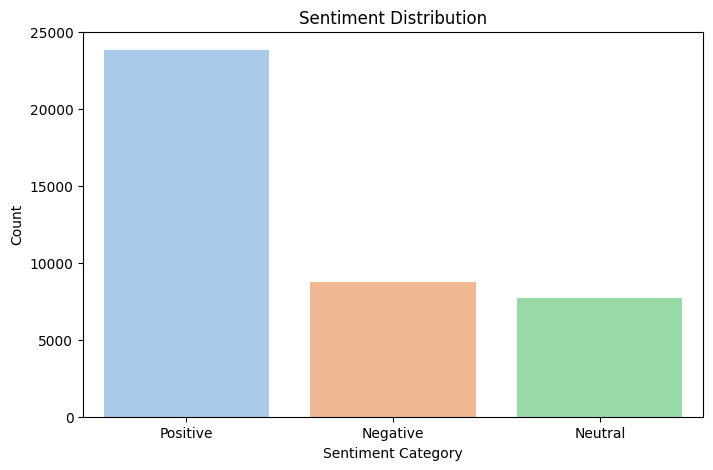

In [30]:
#17. Sentiment analysis: positive, neutral, negative analysis, Polarity and Subjectivity, etc.
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment categories
sentiment_counts = combined_data['Sentiment_Category'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

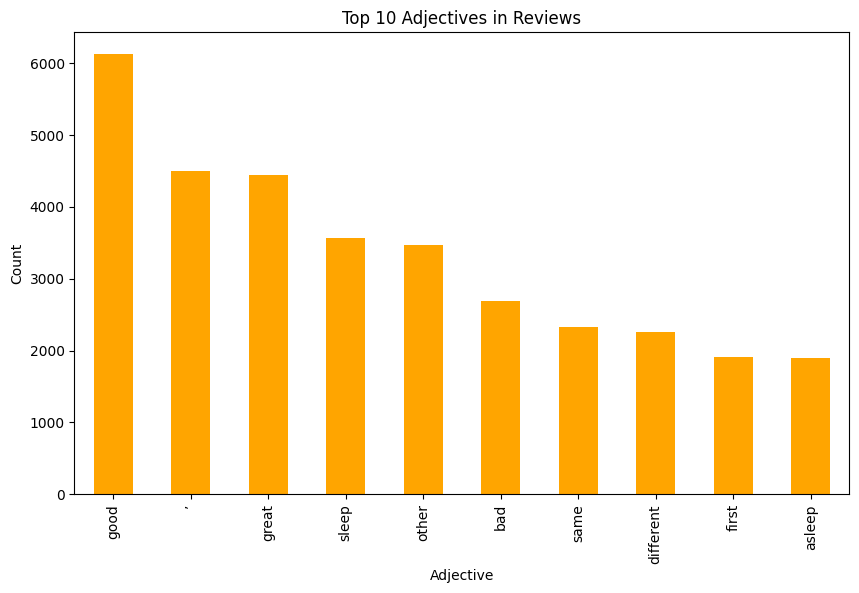

In [31]:
# Convert lists of adjectives to strings before joining
combined_data['Adjectives'] = combined_data['Adjectives'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

adjective_counts = pd.Series(' '.join(combined_data['Adjectives']).split()).value_counts().head(10)
adjective_counts.plot(kind='bar', color='orange', figsize=(10, 6), title='Top 10 Adjectives in Reviews')
plt.xlabel('Adjective')
plt.ylabel('Count')
plt.xticks

In [32]:
#Extract and Convert Dates from review_date column
import pandas as pd
import re

# Function to extract date from the ReviewDate text
def extract_date(review_date):
    # Extract the date using regular expressions
    match = re.search(r'(October|November|December|January|February|March|April|May|June|July|August|September) \d{1,2}, \d{4}', review_date)
    if match:
        return match.group(0)
    return None

# Apply function to extract dates
combined_data['Extracted_Date'] = combined_data['ReviewDate'].apply(extract_date)

# Convert extracted date to datetime format
combined_data['Extracted_Date'] = pd.to_datetime(combined_data['Extracted_Date'], format='%B %d, %Y', errors='coerce')


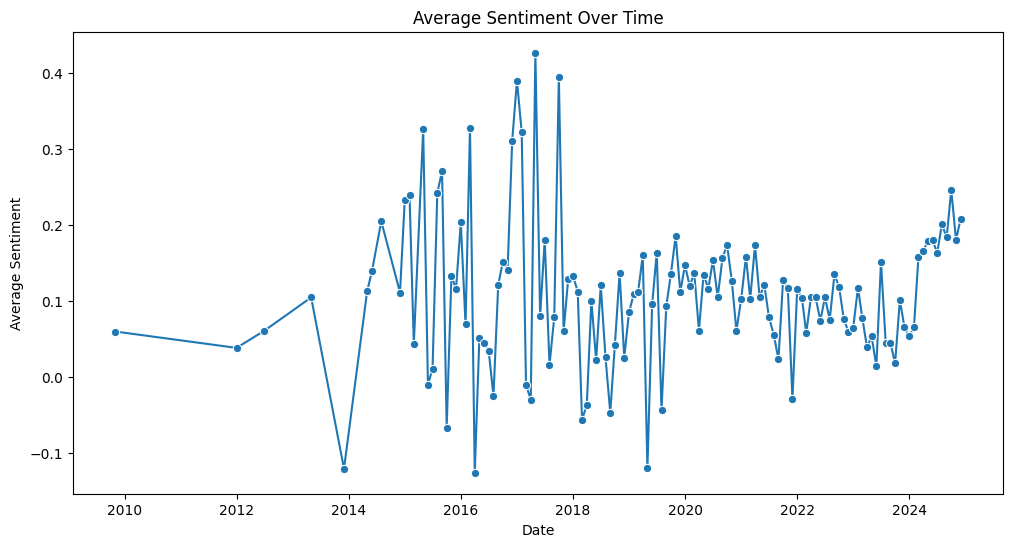

In [33]:
# 18. Check the sentiment over the time.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average sentiment over time
sentiment_over_time = combined_data.resample('ME', on='Extracted_Date')['Sentiment'].mean().reset_index()

# Plot average sentiment over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_over_time, x='Extracted_Date', y='Sentiment', marker='o')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()


<ipython-input-34-0d85e228f548>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews_over_time = combined_data.resample('M', on='Extracted_Date').size().reset_index(name='Number of Reviews')


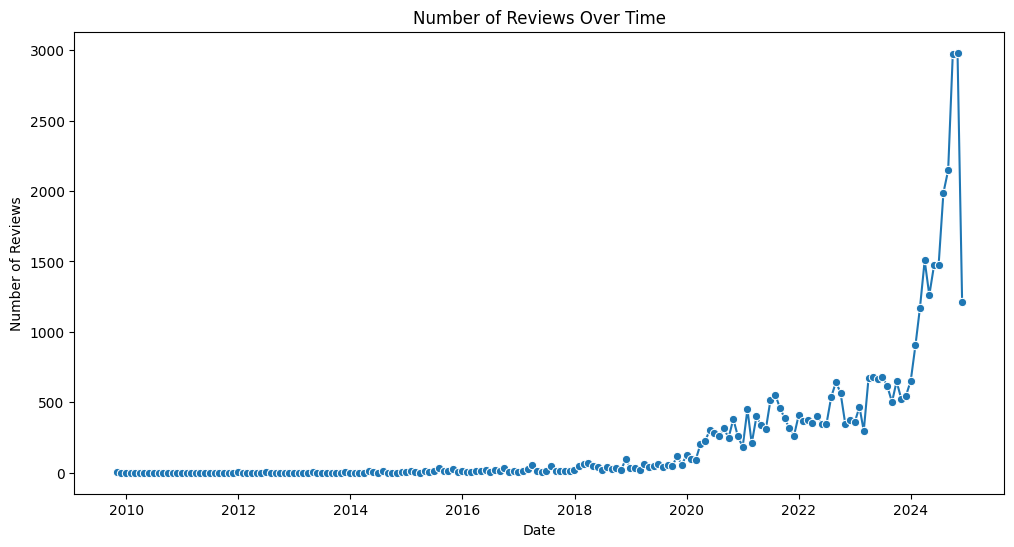

In [34]:
# 19. Number of Reviews Trend Over Time
# Calculate number of reviews over time
reviews_over_time = combined_data.resample('M', on='Extracted_Date').size().reset_index(name='Number of Reviews')

# Plot number of reviews over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=reviews_over_time, x='Extracted_Date', y='Number of Reviews', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


<ipython-input-35-9ec551a5a9a8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=preferred_doses, x='Dose_mg', y='Count', palette="cubehelix")


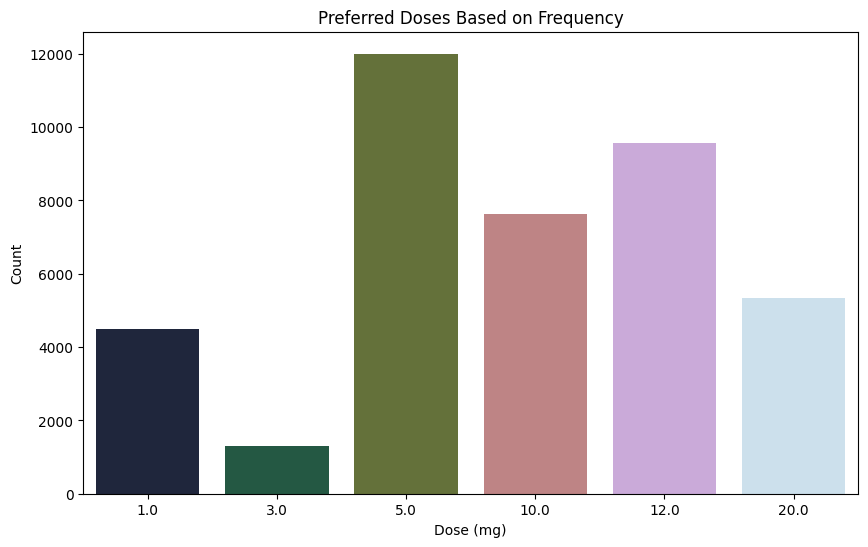

In [35]:
# 20. What Doses People Prefer?

# Plot preferred doses based on frequency in dataset
preferred_doses = combined_data['Dose_mg'].value_counts().reset_index()
preferred_doses.columns = ['Dose_mg', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=preferred_doses, x='Dose_mg', y='Count', palette="cubehelix")
plt.title('Preferred Doses Based on Frequency')
plt.xlabel('Dose (mg)')
plt.ylabel('Count')
plt.show()

**HelpfulCount vs Sentiment Category**

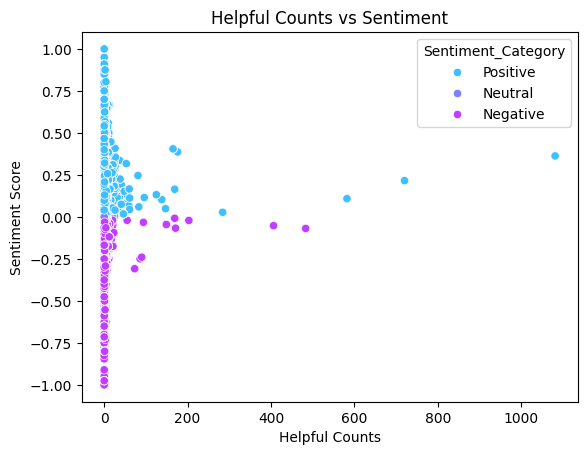

In [36]:
# Import pandas


# Replace commas in 'HelpfulCounts' column and convert to numeric
combined_data['HelpfulCounts'] = pd.to_numeric(combined_data['HelpfulCounts'].astype(str).str.replace(',', ''), errors='coerce')

# Create the scatter plot
sns.scatterplot(x='HelpfulCounts', y='Sentiment', hue='Sentiment_Category', data=combined_data, palette='cool')
plt.title('Helpful Counts vs Sentiment')
plt.xlabel('Helpful Counts')
plt.ylabel('Sentiment Score')
plt.show()

**Drug Recommendation**

In [37]:
combined_data['RecommendationScore'] = combined_data['HelpfulCounts'] + combined_data['ReviewScore'] * 10
combined_data['Recommendation_Status'] = combined_data['RecommendationScore'].apply(
    lambda x: 'Recommended' if x > 15 else 'Not Recommended'
)


In [38]:
combined_data['Recommendation_Status'].value_counts()

,count
Recommendation_Status,
Recommended,31426
Not Recommended,8889


<ipython-input-39-bca0b47f1ce4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_data, x='Recommendation_Status', palette='magma')


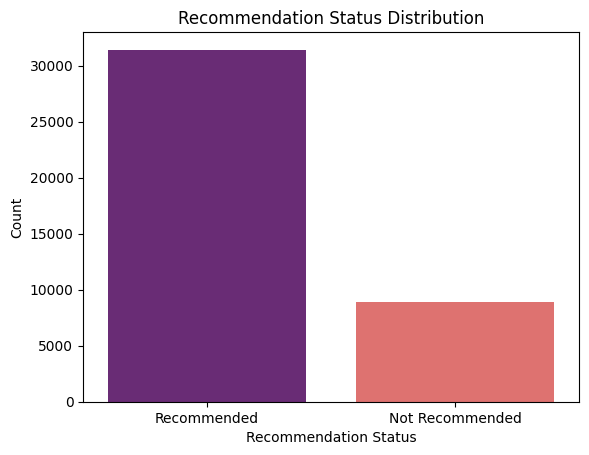

In [39]:
sns.countplot(data=combined_data, x='Recommendation_Status', palette='magma')
plt.title('Recommendation Status Distribution')
plt.xlabel('Recommendation Status')
plt.ylabel('Count')
plt.show()

**Different time taking pills, e.g. 10 minutes before go bed or after feel sleepy**

In [73]:
import re
import pandas as pd

# Function to extract timing phrases
def extract_timing_phrases(text):
    if pd.isna(text):
        return "No Timing Mentioned"
    # Look for timing-related phrases
    patterns = re.findall(r'\b(\d+\s?(minutes?|hours?)\s?(before|after)\s?bed)\b', text.lower())
    return ', '.join([' '.join(match) for match in patterns]) if patterns else "No Timing Mentioned"

# Apply the function to extract timing phrases
combined_data['Timing_Phrases'] = combined_data['ReviewContent'].apply(extract_timing_phrases)


In [74]:
# Aggregate phrase counts
timing_counts = combined_data['Timing_Phrases'].value_counts().reset_index()
timing_counts.columns = ['Timing_Phrase', 'Frequency']
timing_counts = timing_counts[timing_counts['Timing_Phrase'] != 'No Timing Mentioned']


<ipython-input-75-b74d80cf4ba7>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




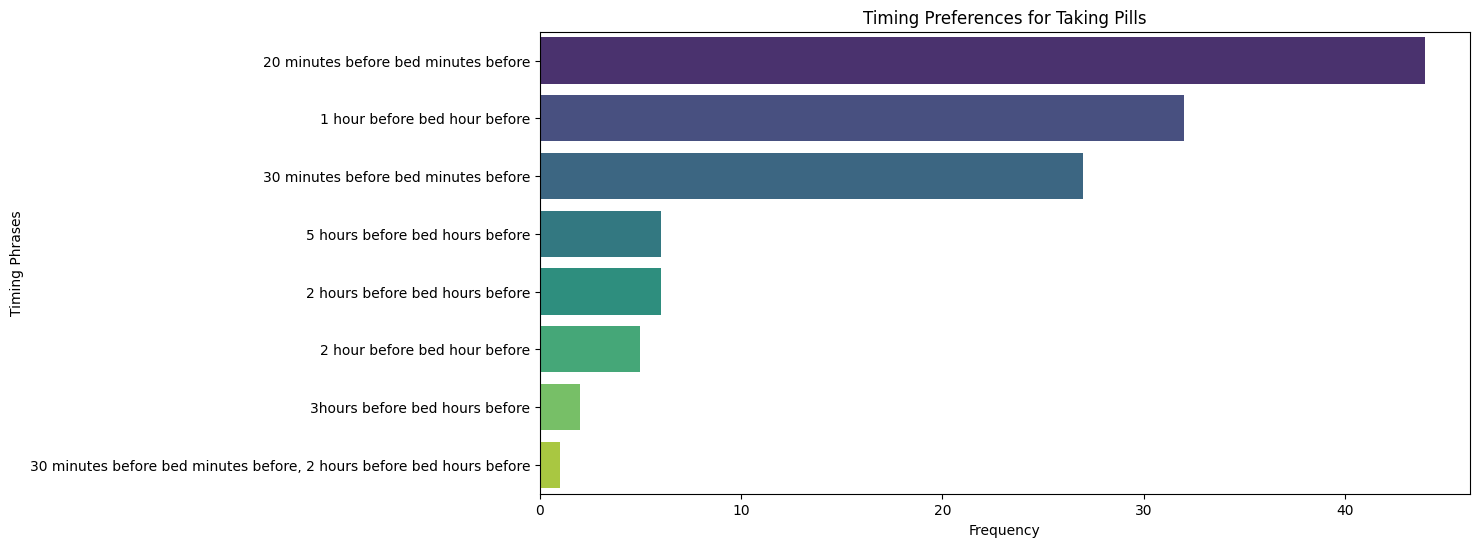

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=timing_counts, x='Frequency', y='Timing_Phrase', palette='viridis')
plt.title('Timing Preferences for Taking Pills')
plt.xlabel('Frequency')
plt.ylabel('Timing Phrases')
plt.show()


In [76]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


**Duration of use: e.g. Tasty and effective; been using for over a year**

In [77]:
import nltk

# Download the necessary NLTK corpora
nltk.download('brown')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

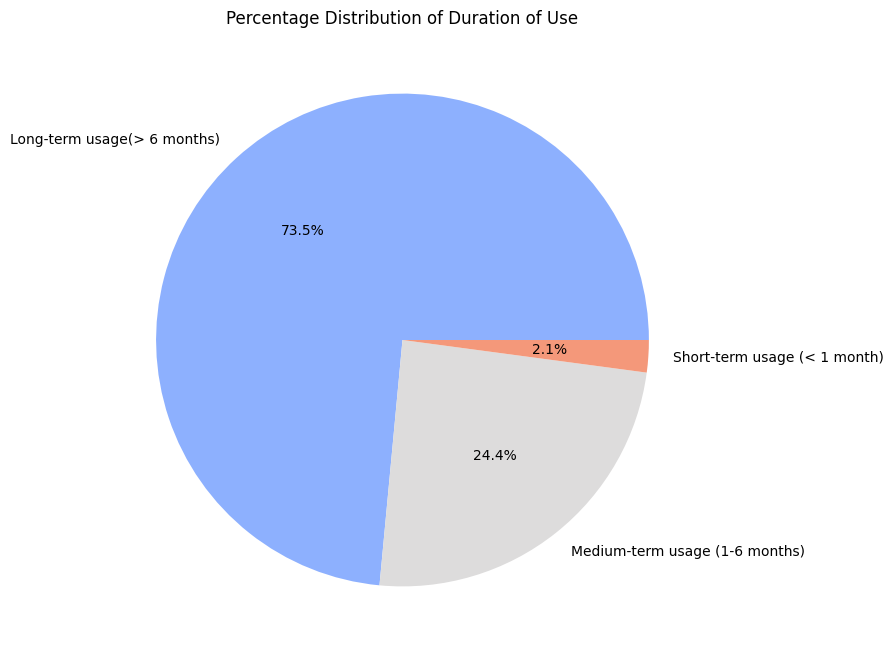

In [78]:
#Duration of use: e.g. Tasty and effective; been using for over a year
from textblob import TextBlob

# Function to extract phrases
def extract_duration_with_textblob(text):
    if pd.isna(text):
        return "No Mention"
    blob = TextBlob(text)
    phrases = [phrase for phrase in blob.noun_phrases if "month" in phrase or "year" in phrase or "day" in phrase or "minutes" in phrase or "hours" in phrase or "hours" in phrase]
    return ", ".join(phrases) if phrases else "No Mention"

# Apply the function
combined_data['Duration_Phrases'] = combined_data['Cleaned_Review'].apply(extract_duration_with_textblob)
# Categorize durations
def categorize_duration(duration_phrase):
    if "days" in duration_phrase or "week" in duration_phrase:
        return "Short-term usage (< 1 month)"
    elif "month" in duration_phrase and "year" not in duration_phrase:
        return "Medium-term usage (1-6 months)"
    elif "year" in duration_phrase:
        return "Long-term usage(> 6 months)"
    else:
        return "No Mention"

combined_data['Duration_Category'] = combined_data['Duration_Phrases'].apply(categorize_duration)
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each duration category
duration_counts = combined_data['Duration_Category'].value_counts().reset_index()
duration_counts.columns = ['Duration_Category', 'Frequency']

# Filter out 'No Mention' category
duration_counts = duration_counts[duration_counts['Duration_Category'] != 'No Mention']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(duration_counts['Frequency'], labels=duration_counts['Duration_Category'], autopct='%1.1f%%', colors=sns.color_palette('coolwarm', n_colors=len(duration_counts)))
plt.title('Percentage Distribution of Duration of Use')
plt.show()



**How long after taking the pills do you feel sleepy?**

<ipython-input-79-46b7160a9e8b>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




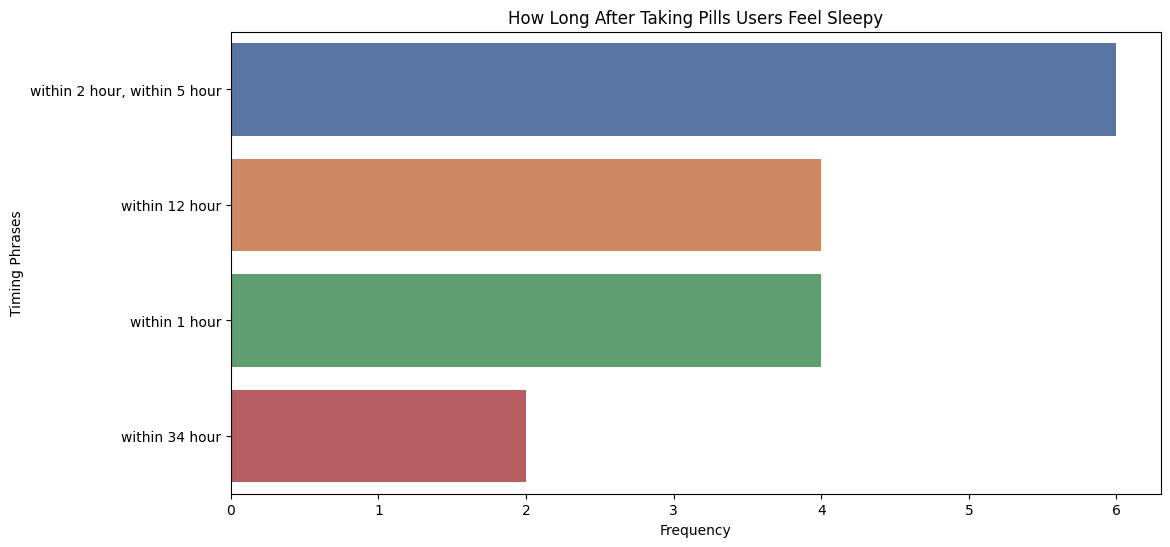

In [79]:
# Function to extract timing phrases:How long after taking the pills do you feel sleepy
def extract_sleepy_timing_phrases(text):
    if pd.isna(text):
        return "No Mention"
    # Improved regex to avoid duplication
    patterns = re.findall(
        r'\b(within\s?\d+\s?(minute|minutes|hour|hours)|\d+\s?(minute|minutes|hour|hours)\s?(after)\s?(taking))\b',
        text.lower()
    )
    # Combine matches
    return ', '.join([' '.join(match).strip() for match in patterns]) if patterns else "No Mention"

# Apply the extraction function
combined_data['Sleepy_Timing_Phrases'] = combined_data['Cleaned_Review'].apply(extract_sleepy_timing_phrases)

# Function to clean extracted phrases
def clean_sleepy_phrases(phrase):
    phrase = phrase.replace("hour hour", "hour").replace("minute minute", "minute")
    return phrase.strip()

# Apply the cleaning function
combined_data['Sleepy_Timing_Phrases'] = combined_data['Sleepy_Timing_Phrases'].apply(clean_sleepy_phrases)
# Count occurrences
sleepy_time_counts = combined_data['Sleepy_Timing_Phrases'].value_counts().reset_index()
sleepy_time_counts.columns = ['Sleepy_Timing_Phrase', 'Frequency']
sleepy_time_counts = sleepy_time_counts[sleepy_time_counts['Sleepy_Timing_Phrase'] != "No Mention"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=sleepy_time_counts.head(10), x='Frequency', y='Sleepy_Timing_Phrase', palette='deep')
plt.title('How Long After Taking Pills Users Feel Sleepy')
plt.xlabel('Frequency')
plt.ylabel('Timing Phrases')
plt.show()



**Average Sentiment by Flavor**

In [80]:
import plotly.express as px

# Calculate average sentiment per flavor
flavor_sentiment = combined_data.groupby('Flavor')['Sentiment'].mean().reset_index()
flavor_sentiment = flavor_sentiment.sort_values(by='Sentiment', ascending=True)

# Create the Plotly bar chart
fig = px.bar(
    flavor_sentiment,
    x='Sentiment',
    y='Flavor',
    orientation='h',  # Set orientation to horizontal for vertical bars
    color='Sentiment', # Color bars based on sentiment
    color_continuous_scale='viridis',  # Use Plasma color scale
    title='Average Sentiment by Flavor'
)

# Customize layout
fig.update_layout(
    xaxis_title='Average Sentiment',
    yaxis_title='Flavor'
)

# Show the chart
fig.show()

**Average Sentiment by Usage Phrases**

<ipython-input-81-bfd2a61c9a04>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




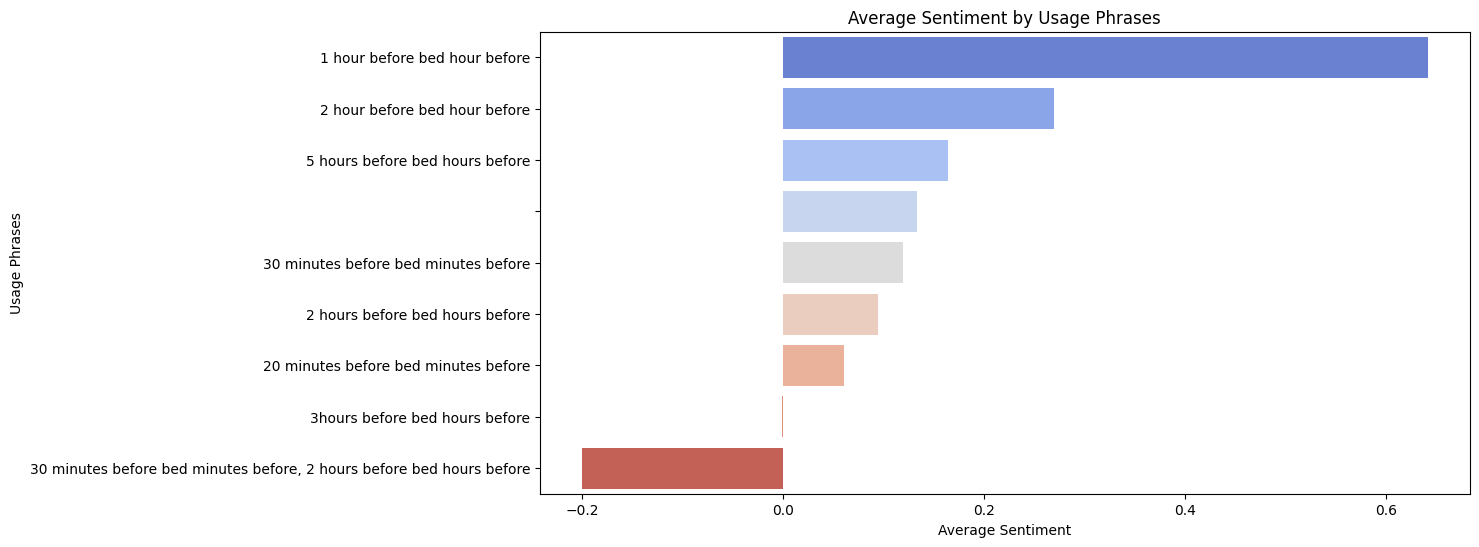

In [81]:
# Group by Usage_Phrases and calculate average sentiment
#6. How do "Usage Phrases" correlate with sentiment?
usage_sentiment = combined_data.groupby('Usage_Phrases')['Sentiment'].mean().reset_index()
usage_sentiment = usage_sentiment.sort_values(by='Sentiment', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=usage_sentiment, x='Sentiment', y='Usage_Phrases', palette='coolwarm')
plt.title('Average Sentiment by Usage Phrases')
plt.xlabel('Average Sentiment')
plt.ylabel('Usage Phrases')
plt.show()


**Heatmap of the Amazon Product**

<Axes: >

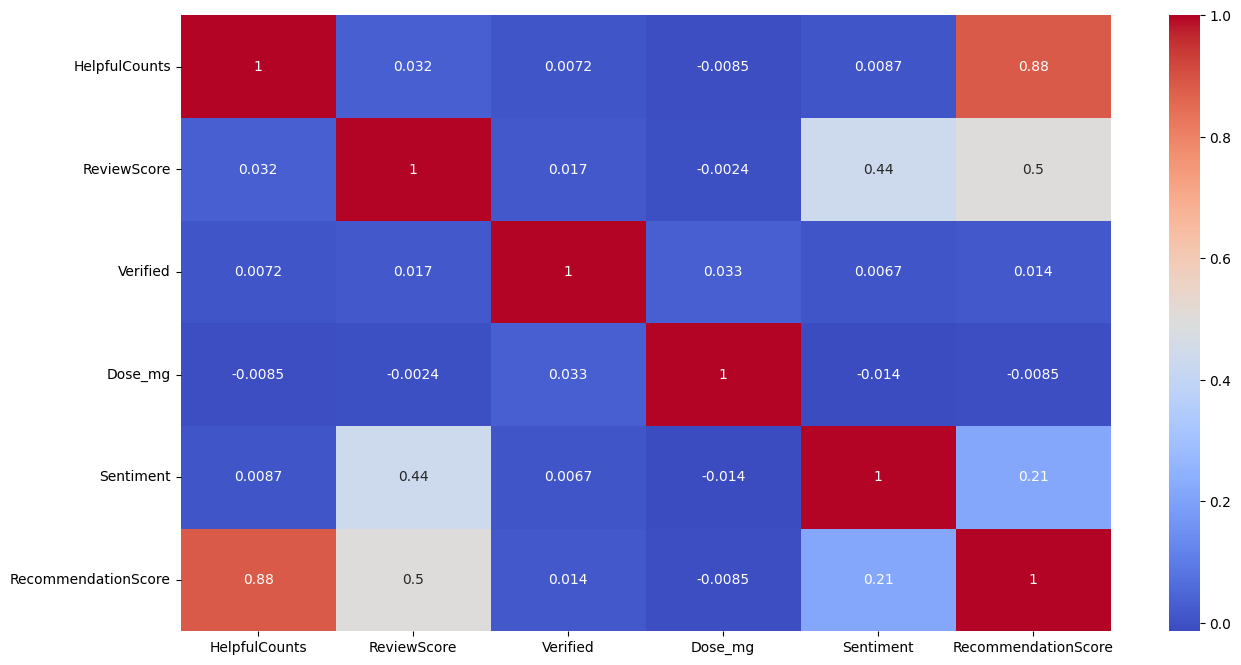

In [86]:
plt.figure(figsize=(15, 8))
sns.heatmap(combined_data.corr(numeric_only=True), annot=True, cmap='coolwarm')